## Introduction to Machine Learning with Computer Vision Problems

### ML(Machine Learning)의 "간단한" 소개
위키백과에선 ML을 이렇게 정의하죠.
>기계 학습(機械學習) 또는 머신 러닝(영어: machine learning)은 인공 지능의 한 분야로, 컴퓨터가 학습할 수 있도록 하는 알고리즘과 기술을 개발하는 분야를 말한다.

위 말 해석 그대로 머신러닝은 컴퓨터가 스스로 학습하도록 만드는 기술입니다. 어떤 인풋이 들어가면 컴퓨터는 그 인풋을 미리 만들어놓은 알고리즘을 통해서 결과를 내놓는데, 이 중간 알고리즘을 처음부터 픽스해놓는 것이 아닌, 인풋으로 들어오는 데이터에 따라 자신을 바꾸어나갈 수 있도록 하는 것이 바로 '머신러닝'입니다. 우리가 흔히 접할 수 있는 유튜브 추천 알고리즘 <del>알수없는 유튜브 추천 알고리즘이 날 여기로 인도했다</del>, 2016년에 굉장히 핫했던 알파고(AlphaGo), Tesla가 자사의 전기차에 기능으로 제공하는 자율주행 'Autopilot' 모두 주변의 환경을 ML에 집어넣어서 학습을 하죠. (참고로, 여러분이 주변에서 들으셨을 '딥 러닝: Deep Learning' 또한 ML에 속합니다! Deep Learning은 컴퓨팅 파워가 좋아짐에 따라 복잡한 모델을 컴퓨터에 돌릴 수 있게 되어 생겨난 용어죠.) 

오늘은, 이 ML에 대해서 한번 간단히 알아보고, 직접 만들어보는 시간을 가져볼 것입니다.

### 1. Linear Regression

ML강의를 들으셨던 분들은 아시겠지만, 항상 ML을 시작할때마다 처음 보이는 파트는 바로 'Linear Regression'입니다. Linear Regression을 해석하면 '선형 회귀'인데, 이 말을 처음 들으시면 무슨 말인지 이해가 어려울 것입니다. 하지만, excel을 써보신 분들은 아시겠죠. '추세선'이라는 기능은 데이터의 추세를 그래프에 띄워주는 기능인데, Linear Regression은 바로 이 추세선을 찾아내는 것을 목적으로 합니다! 예를 들어, 물리학에서 반지름에 따른 관성모멘트의 크기를 실험하고자 할 때, 반지름 r를 x축에 넣고 관성모멘트의 크기를 y축에 넣어서 y=ax^2라는 식을 만들어놓고 a값을 찾아내죠! 이 a값을 찾아내는 알고리즘이 바로 Linear Regression입니다.


자 그럼 긴 설명 없이 코드를 차근차근 따라가면서 Linear Regression이 뭔지 한번 알아보겠습니다!

In [8]:
# 필요한 패키지 (인생을 편하게 해주는 미리 만들어놓은 프로그램이라고 보면 된다) 를 설치시킨다
!cat requirements.txt
!echo '\n위는 우리가 오늘 사용해볼 패키지들 목록입니다!'
!echo '----------------------------------'
!pip install -r requirements.txt
!echo '\n----------------------------------'

numpy
pandas
matplotlib
torch
torchvision
위는 우리가 오늘 사용해볼 패키지들 목록입니다!
----------------------------------

----------------------------------


### 데이터의 준비

자, 그럼 Linear Regression 구현에 앞서, 우리가 사용할 데이터를 찾아봐야겠죠?  
실제 데이터를 바탕으로 하기 전, 한번 간단한 식을 세워서 그 식을 학습해보도록 해요.  
y=3x+4 라는 식을 한번 컴퓨터가 알아맞춰보도록 해볼게요.

In [34]:
# 먼저 matplotlib 이라는 visualization 라이브러리를 import 해볼게요.
import matplotlib.pyplot as plt
%matplotlib inline

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[4, 7, 10, 13, 16, 19, 22, 25, 28, 31]


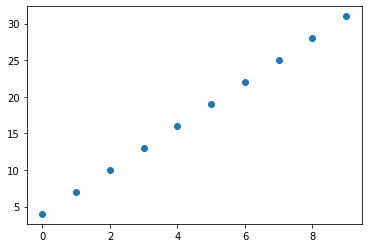

In [35]:
def f(x): return 3 * x + 4 # 3x+4라는 함수를 한번 세워보았어요.
x = [ i for i in range(0,10)] # x값은 0부터 10까지로 설정해볼게요.
y = [ f(i) for i in x]
print(x)
print(y)
plt.scatter(x,y) # 그래프를 그려봐요!

In [36]:
import torch # 우리가 Linear Regression 구현을 편하게 할 수 있도록 도와줄 'PyTorch'라는 라이브러리를 Import 해볼게요.
import torch.nn as nn

x_data = torch.Tensor(x) # torch에서 사용되는 '텐서'로 바꾸어볼게요. 텐서는 벡터, 행렬들을 통틀어 일컫는 말입니다.
y_data = torch.Tensor(y)

자, 데이터는 준비되었으니, 이 데이터를 표현할 모델이 필요해요.  
우리는 방금전에 'y=3x+4'라는 식을 바탕으로 만들었죠?
그러면 우리는 이 식을 알아맞추기 위해서 하나의 '가설(Hypothesis)'을 세워야 해요. 다음과 같이 표현해보죠.  

$$y = {ax + b}$$

이 식을 우리 모델의 '가설'이라 부릅니다. 이제, 이 가설을 바탕으로 모델을 구성해 볼게요.  
pytorch에서는 이 모델을 간단히 구현할 수 있도록 도와줍니다. `nn.Linear` 에서는 이 가설을 이용해서 자동으로 'y=wx+b'라는 식을 만들어줍니다.

In [39]:
class LinearRegression(nn.Module): # nn.Module를 상속받으면 우리는 쉽게 ML 모델을 만들 수 있습니다!
    # 생성자에 우리가 사용할 변수들을 선언해주도록 해볼게요.
    def __init__(self):
        # 부모의 생성자를 불러와주어야 합니다.
        super(LinearRegression, self).__init__()
        
        # nn.Linear 안의 매개변수는 input의 개수와 output의 개수를 나타내줍니다.
        # 우리는 y=ax+b라는 식을 위해 인풋 1개 아웃풋 1개인 모델을 만들어 보았어요.
        self.linear = nn.Linear(1, 1)
    
    # forward 함수는 모델을 통해 예측을 수행할 때 필요로 합니다. 한마디로, 데이터를 이 함수로 흘려보내는거죠.
    def forward(self, x):
        out = self.linear(x)
        return out